In [837]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [838]:
df = pd.read_csv('./DataSet/matches.csv')

# Player of Match

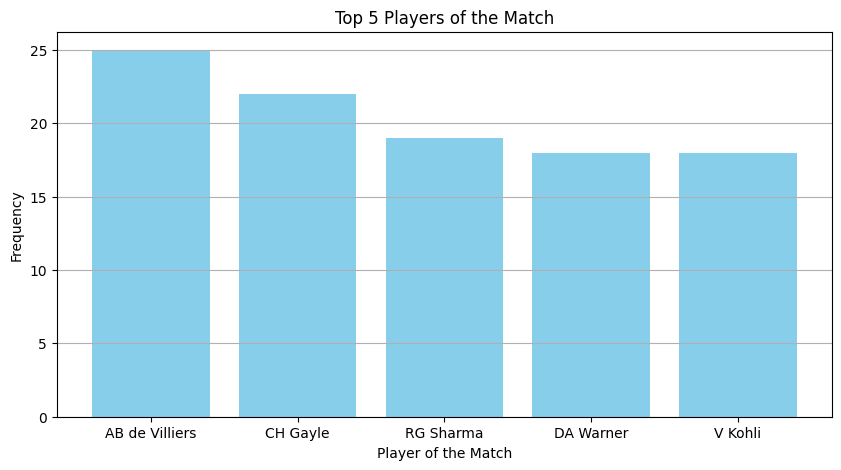

In [839]:
num_top_players = 5

top_players_counts = df['player_of_match'].value_counts().head(num_top_players)

plt.figure(figsize=(10, 5))
plt.bar(top_players_counts.index, top_players_counts.values, color='skyblue')
plt.grid(True, axis='y')
plt.xlabel('Player of the Match')
plt.ylabel('Frequency')
plt.title(f'Top {num_top_players} Players of the Match')
# plt.xticks(rotation=0)
plt.show()


# Total Target Runs per Season

Text(0.5, 1.0, 'Total Target Runs per Season')

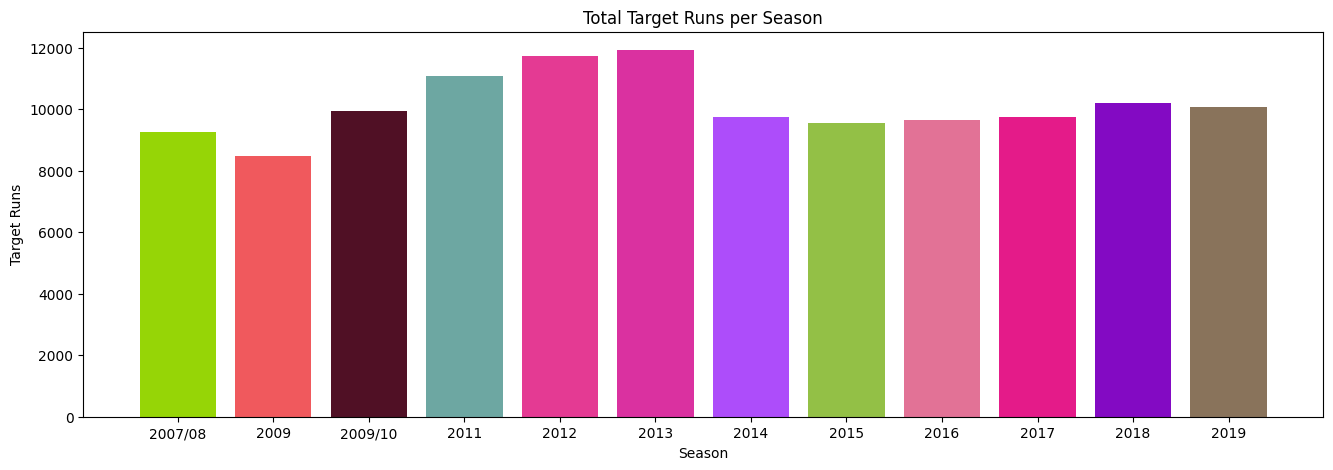

In [840]:
show_record = slice(0, 12)
plt.figure(figsize=(16, 5))
Years_runs = df.groupby('season')['target_runs'].sum()[show_record]

random_colors = np.random.rand(12, 3)

Years = Years_runs.index
Runs = Years_runs.values

plt.bar(Years, Runs, color=random_colors)

plt.xlabel('Season')
plt.ylabel('Target Runs')
plt.title('Total Target Runs per Season')

# Match Wins per Team by Season

In [841]:
def generate_abbreviation(team_name):
    # Check if the team name is a valid string
    if isinstance(team_name, str):
        # Split the team name into words and take the first letter of each word
        words = team_name.split()
        abbreviation = ''.join([word[0].upper() for word in words])
        return abbreviation
    else:
        # If not a valid string (NaN or other), return 'Unknown' or a default value
        return "Unknown"

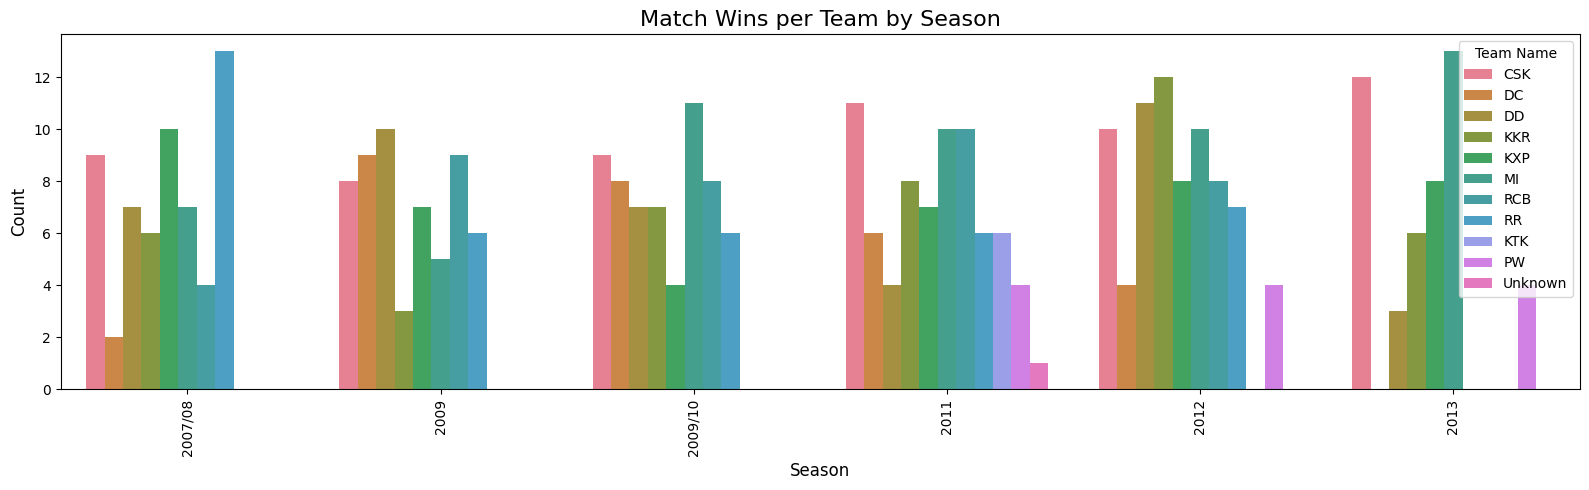

In [842]:


# Ensure 'generate_abbreviation' and 'df' are defined
df['sorter_name'] = df['winner'].apply(generate_abbreviation)

# Aggregate the data efficiently
Years_winner = df.groupby(['season', 'sorter_name']).size().reset_index(name='win_count')

# Slice only the relevant portion of the data
show_record = slice(0, 50)

Years_winner = Years_winner.iloc[show_record]

# Plotting
plt.figure(figsize=(16, 5))

# Create the bar plot
ax = sns.barplot(data=Years_winner, x='season', y='win_count', hue='sorter_name')

# Set plot labels and title
plt.title("Match Wins per Team by Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Customize the legend
ax.legend(title="Team Name")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Top Results by Wins

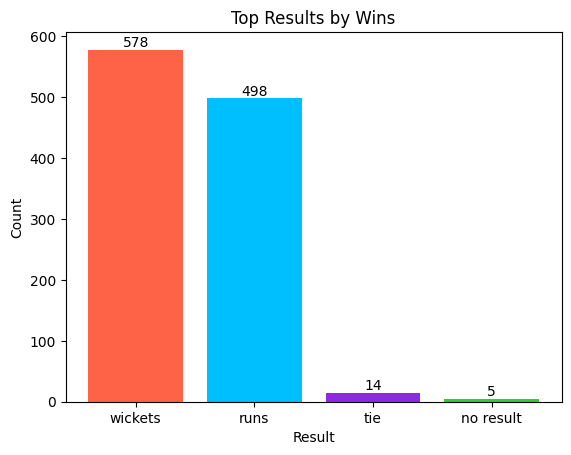

In [843]:


win_by = df.result.value_counts().reset_index(  )
# Generate random colors for each bar
bar_colors = ['#FF6347', '#00BFFF', '#8A2BE2', '#32CD32', '#FF1493']

# Plot the bar chart
bar_container = plt.bar(win_by['result'], win_by['count'], color=bar_colors)

# Adding the result labels on top of the bars
for i, bar in enumerate(bar_container):
    # Get the x and height of the bar
    height = bar.get_height()
    x_position = bar.get_x() + bar.get_width() / 2  # Position to center the label
    
    # Add text label on top of each bar
    plt.text(x_position, height + 0.1, win_by['count'][i], ha='center', va='bottom', fontsize=10)

plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Top Results by Wins')
plt.show()


In [844]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,sorter_name
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,KKR
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,CSK
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,DD
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,RCB
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,KKR


# Top 5 Maximum Target Runs for Each Team

<Figure size 1000x600 with 0 Axes>

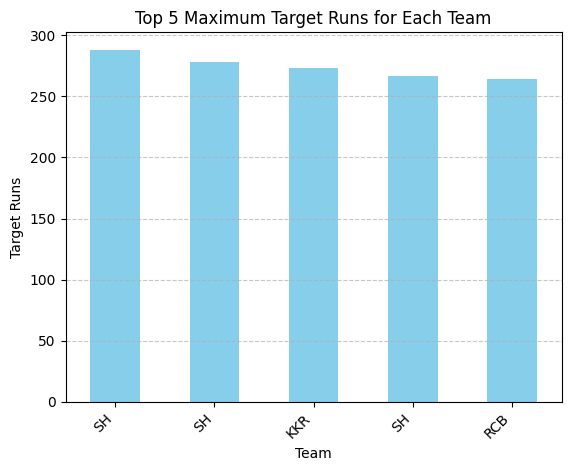

In [859]:
# Create a bar plot for the unique teams and their maximum target runs
num_top_team = 5

team_target_runs =  df.nlargest(num_top_team , 'target_runs' ,)[['sorter_name' ,'target_runs']]
plt.figure(figsize=(10, 6))
team_target_runs.plot(kind='bar', x= 'sorter_name' , y ='target_runs', color='skyblue' , legend = False)


# Add labels and title
plt.xlabel('Team')
plt.ylabel('Target Runs')
plt.title(f'Top {num_top_team} Maximum Target Runs for Each Team')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()